In [25]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score,plot_confusion_matrix,matthews_corrcoef
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train_balanced.csv")
train_x = train.iloc[:,0:14]
train_y = train.iloc[:,-1]

In [ ]:
#Grid CV Search
svc = SVC()
params = {"C":[0.005,0.01,0.015,0.02],
              "kernel":["linear","poly","sigmoid"],
              "degree":[1,2,3]}
f1 = make_scorer(f1_score , average='weighted')
acc = make_scorer(balanced_accuracy_score)

In [ ]:
search =GridSearchCV(svc,params,scoring={"f1":f1,"acc":acc},n_jobs=1,refit=False,verbose=10).fit(X,Y)

In [29]:
svc = SVC(C=0.02,kernel="linear")
svc.fit(train_x,train_y)

SVC(C=0.02, kernel='linear')

Text(0.5, 1.0, 'Training Set')

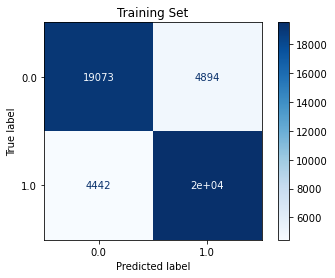

In [55]:
#Metrics on training set
cm = plot_confusion_matrix(svc,train_x,train_y,cmap=plt.cm.Blues)
plt.title("Training Set")

In [31]:
train_results = svc.predict(train_x)

In [33]:
balanced_accuracy_score(train_y,train_results)

0.8052321942671172

In [49]:
#Testing Set
test = pd.read_csv("test_set.csv")
test_x = test.iloc[:,0:14]
test_y = test.iloc[:,-1]

In [51]:
test_results=svc.predict(test_x)

Text(0.5, 1.0, 'Test Set')

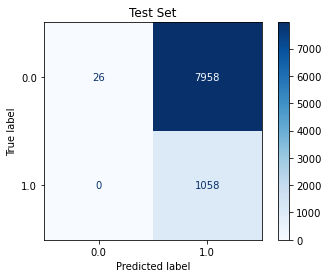

In [56]:
cm = plot_confusion_matrix(svc,test_x,test_y,cmap=plt.cm.Blues)
plt.title("Test Set")

In [54]:
balanced_accuracy_score(test_y,test_results)

0.501628256513026

In [60]:
# Full  Dataset Test
full = pd.read_csv("bank_clean.csv")
full_x = full.iloc[:,0:14]
full_y = full.iloc[:,-1]

In [61]:
full_results = svc.predict(full_x)

Text(0.5, 1.0, 'Full DataSet')

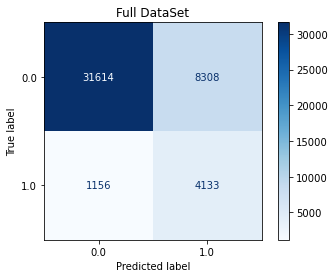

In [63]:
cm = plot_confusion_matrix(svc,full_x,full_y,cmap=plt.cm.Blues)
plt.title("Full DataSet")

In [66]:
balanced_accuracy_score(full_y,full_results)

0.7866636784232562

In [67]:
(825+1748)/len(test)

0.2845609378456094